In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('clean_data.csv')
data.head()

,Date,Tesla_Adj Close,Tesla_Close,Tesla_High,Tesla_Low,Tesla_Open,Tesla_Volume,Ford_Adj Close,Ford_Close,Ford_High,...,Volkswagen_High,Volkswagen_Low,Volkswagen_Open,Volkswagen_Volume,Hyundai_Adj Close,Hyundai_Close,Hyundai_High,Hyundai_Low,Hyundai_Open,Hyundai_Volume
0,2019-01-02,20.67,20.67,21.01,19.92,20.41,174879000,5.94,7.90,8.02,...,15.51,15.30,15.31,94200,23.86,25.25,25.25,25.25,25.25,0
1,2019-01-03,20.02,20.02,20.63,19.83,20.47,104478000,5.85,7.78,7.99,...,15.50,15.37,15.41,90100,23.86,25.25,25.25,25.25,25.25,100
2,2019-01-04,21.18,21.18,21.20,20.18,20.40,110911500,6.07,8.08,8.12,...,16.08,15.73,15.76,106500,23.86,25.25,25.25,25.25,25.25,0
3,2019-01-07,22.33,22.33,22.45,21.18,21.45,113268000,6.23,8.29,8.37,...,16.35,16.17,16.26,158100,23.86,25.25,25.25,25.25,25.25,500
4,2019-01-08,22.36,22.36,22.93,21.80,22.80,105127500,6.29,8.37,8.54,...,16.64,16.38,16.61,106900,23.86,25.25,25.25,25.25,25.25,100


In [4]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Tesla_Close', "Ford_Close", "BMW_Close", "Volkswagen_Close","Hyundai_Close"]])

In [6]:
def create_sequences(data, time_steps=60):
    X = []
    y = []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

In [7]:
X, y = create_sequences(scaled_data)

In [8]:
X.shape

(1409, 60, 5)

In [9]:
y.shape

(1409, 5)

In [10]:
train_size = int(len(X) * 0.9)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [14]:
from keras.models import Sequential
from keras.layers import GRU,Dense,Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
import matplotlib.pyplot as plt


In [13]:
model_gru = Sequential()

model_gru.add(GRU(units=50, return_sequences=True, input_shape=(60, 5)))
model_gru.add(Dropout(0.2))

model_gru.add(GRU(units=90, return_sequences=False))
model_gru.add(Dropout(0.2))

model_gru.add(Dense(units=5))

optimizer = Adam(learning_rate=0.001)
model_gru.compile(optimizer=optimizer, loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
model_checkpoint = ModelCheckpoint('Tesla_Ford_GRU_best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - loss: 0.0031
Epoch 1: val_loss did not improve from 0.00105
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 181ms/step - loss: 0.0031 - val_loss: 0.0022
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - loss: 0.0034
Epoch 2: val_loss did not improve from 0.00105
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 188ms/step - loss: 0.0034 - val_loss: 0.0013
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0029
Epoch 3: val_loss did not improve from 0.00105
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.0029 - val_loss: 0.0018
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.0030
Epoch 4: val_loss did not improve from 0.00105
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 0.0030 - val_loss: 0.0011
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 0.0029
Epoch 5: val_loss did not improve from 0.00105
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - loss: 0.0029 - val_loss: 0.0017
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step 

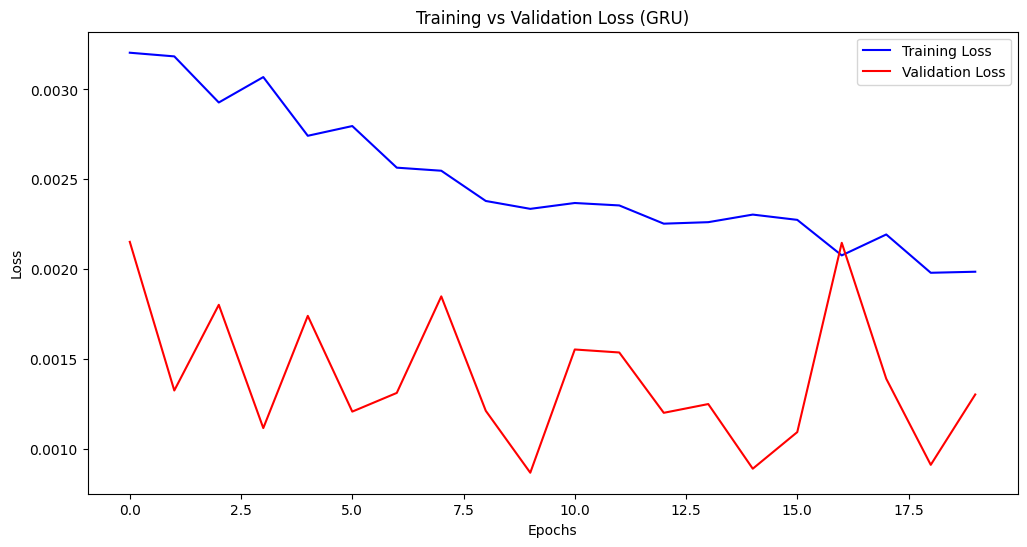

In [16]:
history = model_gru.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping, model_checkpoint],
                    verbose=1)

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training vs Validation Loss (GRU)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.1591
Epoch 1: val_loss improved from inf to 0.03483, saving model to Tesla_Ford_GRU_best_model.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - loss: 0.1569 - val_loss: 0.0348
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0142
Epoch 2: val_loss improved from 0.03483 to 0.02029, saving model to Tesla_Ford_GRU_best_model.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 0.0141 - val_loss: 0.0203
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0078
Epoch 3: val_loss improved from 0.02029 to 0.01489, saving model to Tesla_Ford_GRU_best_model.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 0.0078 - val_loss: 0.0149
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.0065
Epoch 4: val_loss did not improve from 0.01489
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - loss: 0.0065 - val_loss: 0.0151
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.0054
Epoch 5: val_loss impro

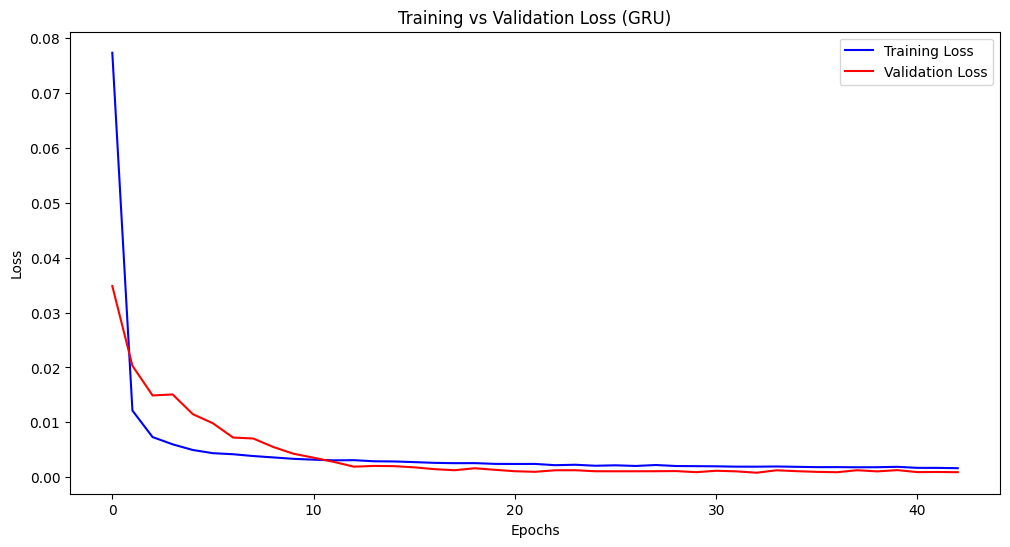

In [19]:
model_gru = Sequential()

model_gru.add(GRU(units=50, return_sequences=True, input_shape=(60, 5)))
model_gru.add(Dropout(0.1))

model_gru.add(GRU(units=50, return_sequences=False))
model_gru.add(Dropout(0.1))

model_gru.add(Dense(units=5))

optimizer = Adam(learning_rate=0.001)
model_gru.compile(optimizer=optimizer, loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
model_checkpoint = ModelCheckpoint('Tesla_Ford_GRU_best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)

history = model_gru.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping, model_checkpoint],
                    verbose=1)

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training vs Validation Loss (GRU)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step


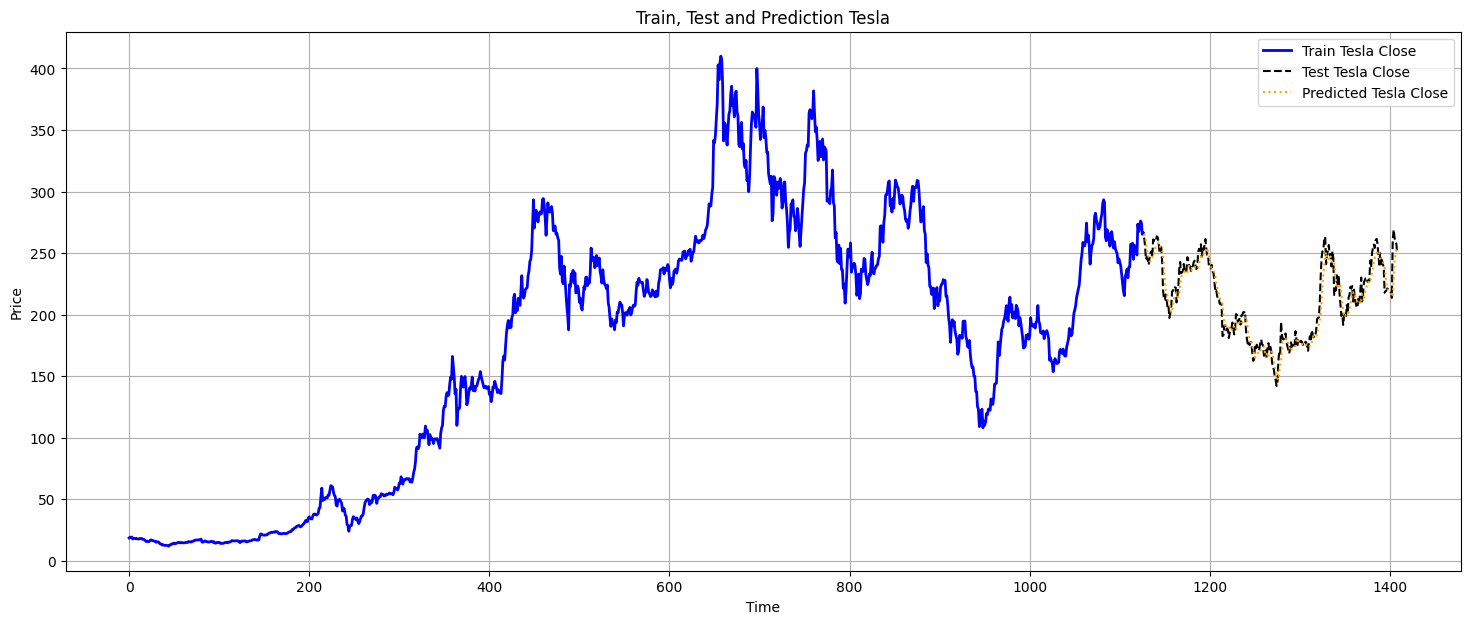

Tesla - MSE: 98.66266958029021, RMSE : 9.932908414975456, MAE: 7.112740692787981, R2: 0.8990980822675056


In [20]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,root_mean_squared_error

y_pred = model_gru.predict(X_test)

y_train_actual = scaler.inverse_transform(y_train)
y_test_actual = scaler.inverse_transform(y_test)
y_pred_actual = scaler.inverse_transform(y_pred)

plt.figure(figsize=(18, 7))

train_size = len(y_train_actual)

plt.plot(np.arange(train_size), y_train_actual[:, 0], label='Train Tesla Close', color='blue', linewidth=2)

plt.plot(np.arange(train_size, train_size + len(y_test_actual)), y_test_actual[:, 0], label='Test Tesla Close', color='black', linestyle='dashed')
plt.plot(np.arange(train_size, train_size + len(y_pred_actual)), y_pred_actual[:, 0], label='Predicted Tesla Close', color='orange', linestyle='dotted')

plt.title('Train, Test and Prediction Tesla')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

errors = {}

rmse_tesla = root_mean_squared_error(y_test_actual[:, 0], y_pred_actual[:, 0])
mse_tesla = mean_squared_error(y_test_actual[:, 0], y_pred_actual[:, 0])
mae_tesla = mean_absolute_error(y_test_actual[:, 0], y_pred_actual[:, 0])
r2_tesla = r2_score(y_test_actual[:, 0], y_pred_actual[:, 0])
errors['Tesla'] = {
    'RMSE': rmse_tesla,
    'MSE': mse_tesla,
    'MAE': mae_tesla,
    'R2': r2_tesla
}

print(f"Tesla - MSE: {mse_tesla}, RMSE : {rmse_tesla}, MAE: {mae_tesla}, R2: {r2_tesla}")


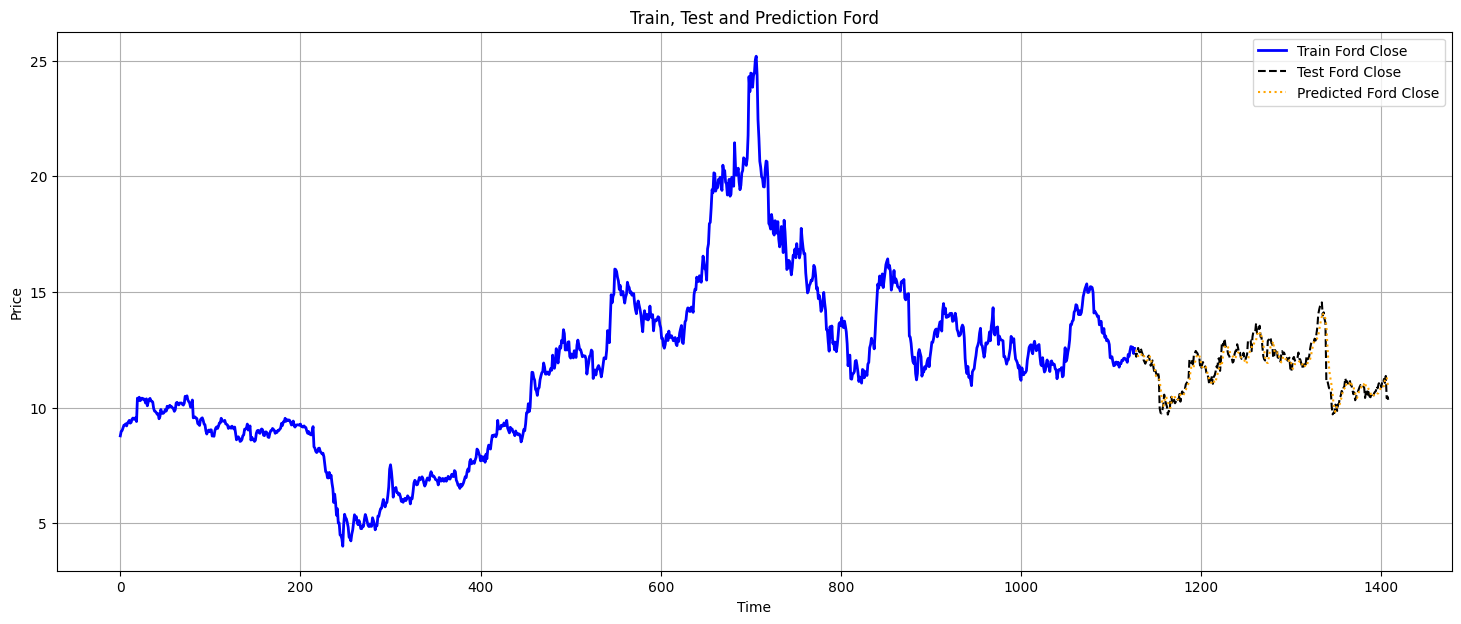

Ford - MSE: 0.14746914702255792, RMSE : 0.38401711813740536, MAE: 0.27007096716698176, R2: 0.858173949655885


In [21]:
plt.figure(figsize=(18, 7))

train_size = len(y_train_actual)

plt.plot(np.arange(train_size), y_train_actual[:, 1], label='Train Ford Close', color='blue', linewidth=2)

plt.plot(np.arange(train_size, train_size + len(y_test_actual)), y_test_actual[:, 1], label='Test Ford Close', color='black', linestyle='dashed')
plt.plot(np.arange(train_size, train_size + len(y_pred_actual)), y_pred_actual[:, 1], label='Predicted Ford Close', color='orange', linestyle='dotted')

plt.title('Train, Test and Prediction Ford')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

rmse_ford = root_mean_squared_error(y_test_actual[:, 1], y_pred_actual[:, 1])
mse_ford = mean_squared_error(y_test_actual[:, 1], y_pred_actual[:, 1])
mae_ford = mean_absolute_error(y_test_actual[:, 1], y_pred_actual[:, 1])
r2_ford = r2_score(y_test_actual[:, 1], y_pred_actual[:, 1])

errors['Ford'] = {
    'RMSE': rmse_ford,
    'MSE': mse_ford,
    'MAE': mae_ford,
    'R2': r2_ford
}

print(f"Ford - MSE: {mse_ford}, RMSE : {rmse_ford}, MAE: {mae_ford}, R2: {r2_ford}")


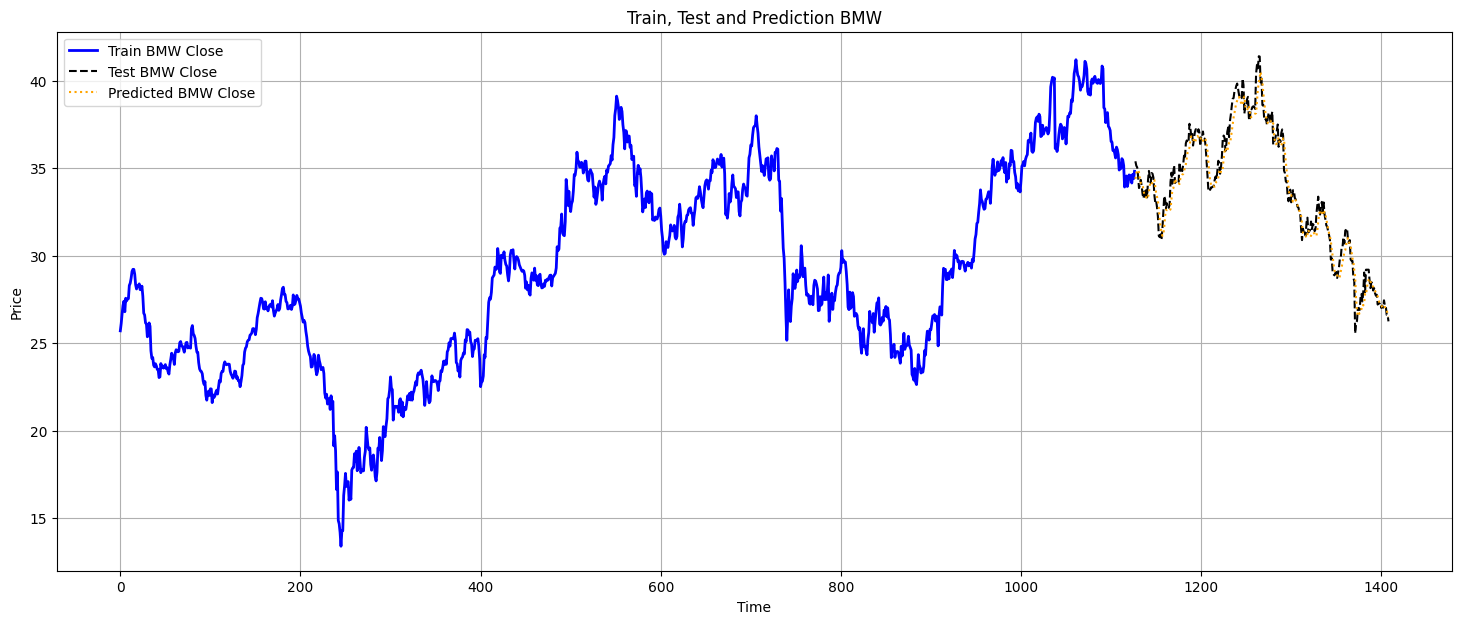

BMW - MSE: 0.5589709431457206, RMSE : 0.7476435936632645, MAE: 0.5708797747023563, R2: 0.9590185755346138


In [22]:
plt.figure(figsize=(18, 7))

train_size = len(y_train_actual)

plt.plot(np.arange(train_size), y_train_actual[:, 2], label='Train BMW Close', color='blue', linewidth=2)

plt.plot(np.arange(train_size, train_size + len(y_test_actual)), y_test_actual[:, 2], label='Test BMW Close', color='black', linestyle='dashed')
plt.plot(np.arange(train_size, train_size + len(y_pred_actual)), y_pred_actual[:, 2], label='Predicted BMW Close', color='orange', linestyle='dotted')

plt.title('Train, Test and Prediction BMW')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

rmse_bmw = root_mean_squared_error(y_test_actual[:, 2], y_pred_actual[:, 2])
mse_bmw = mean_squared_error(y_test_actual[:, 2], y_pred_actual[:, 2])
mae_bmw = mean_absolute_error(y_test_actual[:, 2], y_pred_actual[:, 2])
r2_bmw = r2_score(y_test_actual[:, 2], y_pred_actual[:, 2])

errors['BMW'] = {
    'RMSE': rmse_bmw,
    'MSE': mse_bmw,
    'MAE': mae_bmw,
    'R2': r2_bmw
}

print(f"BMW - MSE: {mse_bmw}, RMSE : {rmse_bmw}, MAE: {mae_bmw}, R2: {r2_bmw}")


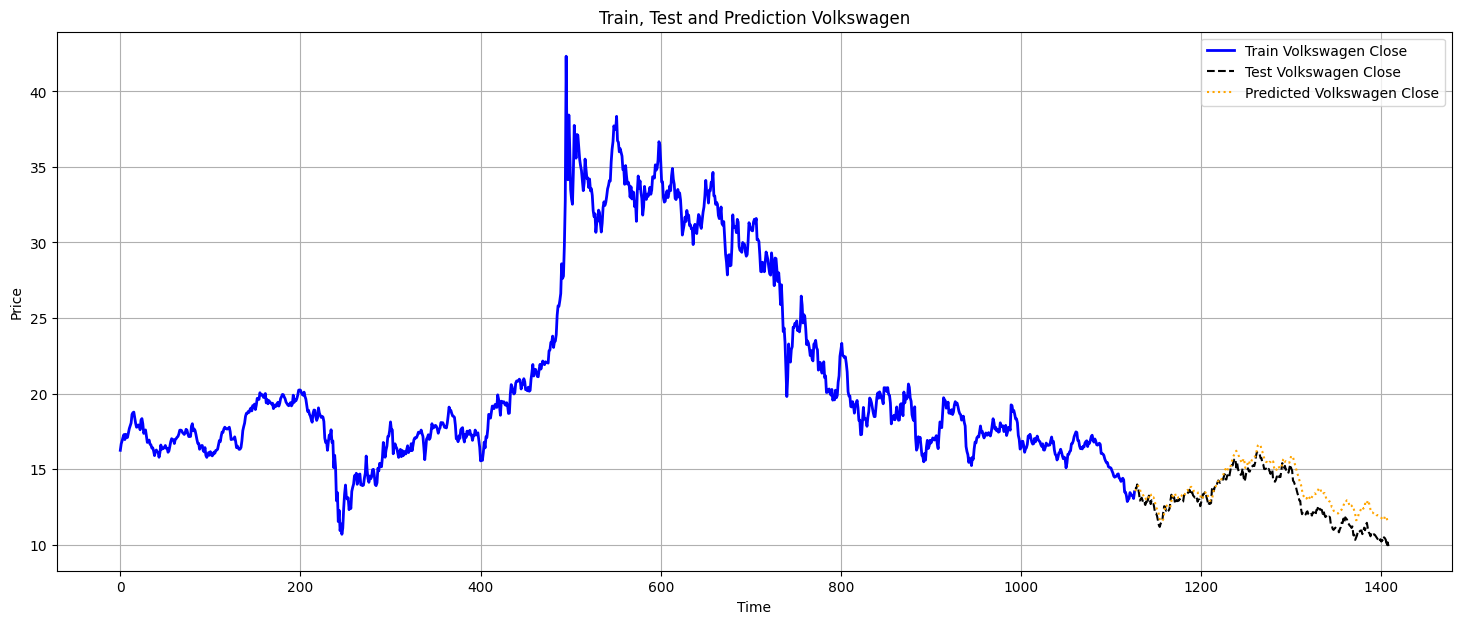

Volkswagen - MSE: 0.8311312359701601, RMSE : 0.9116639929108532, MAE: 0.7552397884882933, R2: 0.6670549869756606


In [23]:
plt.figure(figsize=(18, 7))

train_size = len(y_train_actual)

plt.plot(np.arange(train_size), y_train_actual[:, 3], label='Train Volkswagen Close', color='blue', linewidth=2)

plt.plot(np.arange(train_size, train_size + len(y_test_actual)), y_test_actual[:, 3], label='Test Volkswagen Close', color='black', linestyle='dashed')
plt.plot(np.arange(train_size, train_size + len(y_pred_actual)), y_pred_actual[:, 3], label='Predicted Volkswagen Close', color='orange', linestyle='dotted')

plt.title('Train, Test and Prediction Volkswagen')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

rmse_volkswagen = root_mean_squared_error(y_test_actual[:, 3], y_pred_actual[:, 3])
mse_volkswagen = mean_squared_error(y_test_actual[:, 3], y_pred_actual[:, 3])
mae_volkswagen = mean_absolute_error(y_test_actual[:, 3], y_pred_actual[:, 3])
r2_volkswagen = r2_score(y_test_actual[:, 3], y_pred_actual[:, 3])

errors['Volkswagen'] = {
    'RMSE': rmse_volkswagen,
    'MSE': mse_volkswagen,
    'MAE': mae_volkswagen,
    'R2': r2_volkswagen
}
print(f"Volkswagen - MSE: {mse_volkswagen}, RMSE : {rmse_volkswagen}, MAE: {mae_volkswagen}, R2: {r2_volkswagen}")


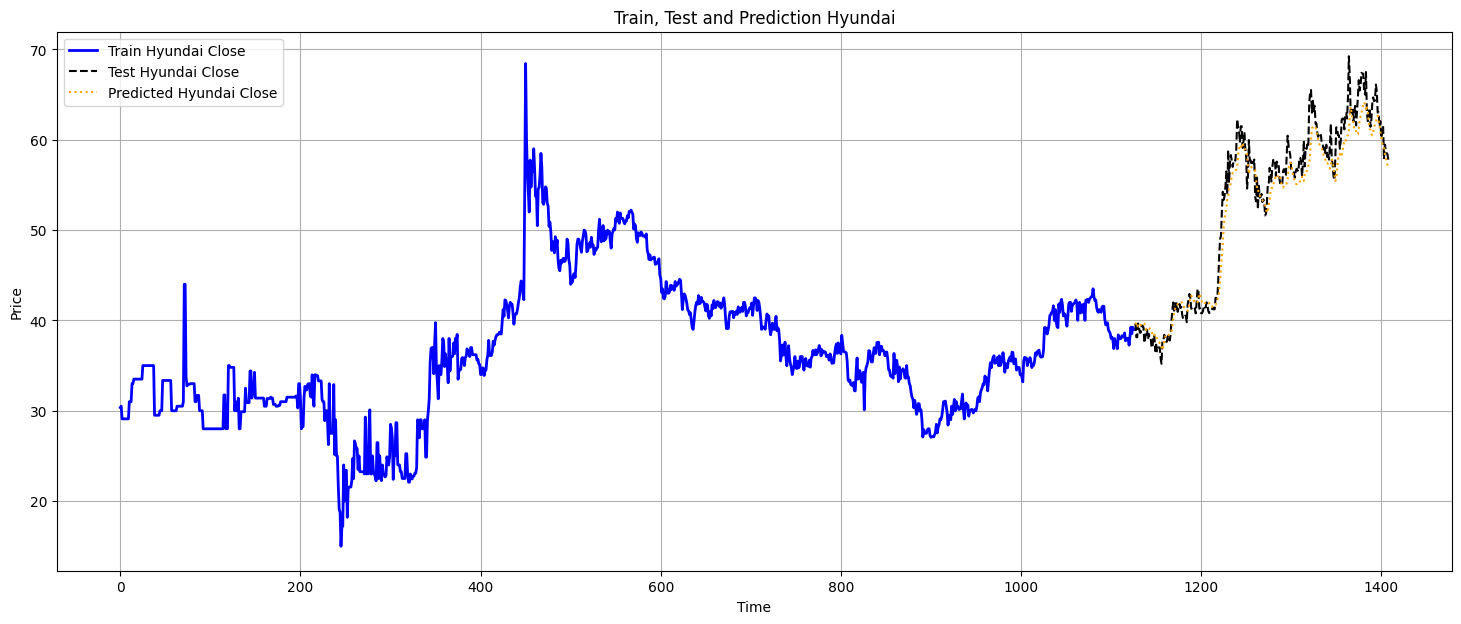

Hyundai - MSE: 4.525958560078492, RMSE : 2.1274300364708805, MAE: 1.5839646116216133, R2: 0.9512334312124027


In [24]:
plt.figure(figsize=(18, 7))

train_size = len(y_train_actual)

plt.plot(np.arange(train_size), y_train_actual[:, 4], label='Train Hyundai Close', color='blue', linewidth=2)

plt.plot(np.arange(train_size, train_size + len(y_test_actual)), y_test_actual[:, 4], label='Test Hyundai Close', color='black', linestyle='dashed')
plt.plot(np.arange(train_size, train_size + len(y_pred_actual)), y_pred_actual[:, 4], label='Predicted Hyundai Close', color='orange', linestyle='dotted')

plt.title('Train, Test and Prediction Hyundai')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

rmse_hyundai = root_mean_squared_error(y_test_actual[:, 4], y_pred_actual[:, 4])
mse_hyundai = mean_squared_error(y_test_actual[:, 4], y_pred_actual[:, 4])
mae_hyundai = mean_absolute_error(y_test_actual[:, 4], y_pred_actual[:, 4])
r2_hyundai = r2_score(y_test_actual[:, 4], y_pred_actual[:, 4])

errors['Hyundai'] = {
    'RMSE': rmse_hyundai,
    'MSE': mse_hyundai,
    'MAE': mae_hyundai,
    'R2': r2_hyundai
}

print(f"Hyundai - MSE: {mse_hyundai}, RMSE : {rmse_hyundai}, MAE: {mae_hyundai}, R2: {r2_hyundai}")
